In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

Day.type count

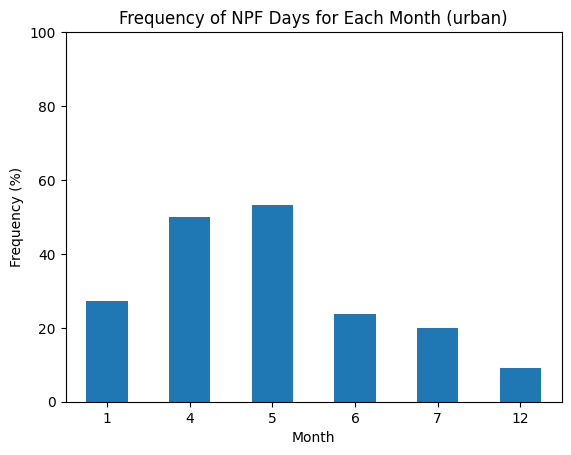

In [3]:
# Read dataset
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\in_progress\\output_combined.csv')
# Prep the dataset
df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.dayofyear
df = df.drop(df.index[-1])
df_temp = df[['day.type', 'month']].copy()
grouped = df.groupby('month')['day.type'].value_counts().unstack(fill_value=0)
grouped['Percentage NPF'] = (grouped['NPF'] / grouped.sum(axis=1)) * 100

grouped['Percentage NPF'].plot(kind='bar')
plt.title('Frequency of NPF Days for Each Month (urban)')
plt.xlabel('Month')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limit to ensure percentages are within range
plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\png\\count_day.type_month.png', dpi=300)

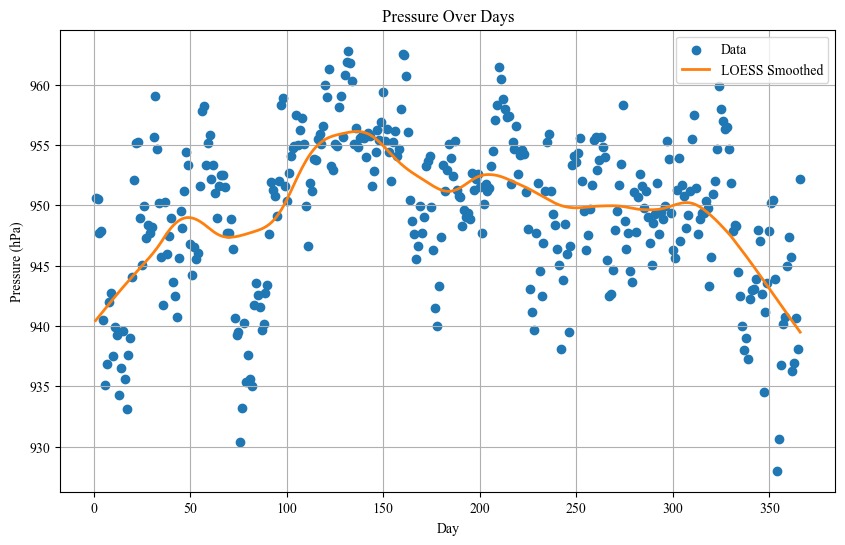

In [17]:
grouped_data = df.groupby('day')['pressure'].mean()
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'

# Plot the scatter plot
plt.scatter(grouped_data.index, grouped_data, color='tab:blue', label='Data')

# Smooth the data using LOESS
smoothed = lowess(grouped_data.values, grouped_data.index, frac=0.2)

# Plot the LOESS smoothed line
plt.plot(smoothed[:,0], smoothed[:,1], color='tab:orange', linewidth=2, label='LOESS Smoothed')

plt.title('Pressure Over Days')
plt.xlabel('Day')
plt.ylabel('Pressure (hPa)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\png\\P_day.png', dpi=300)
plt.show()

Relative Humidity

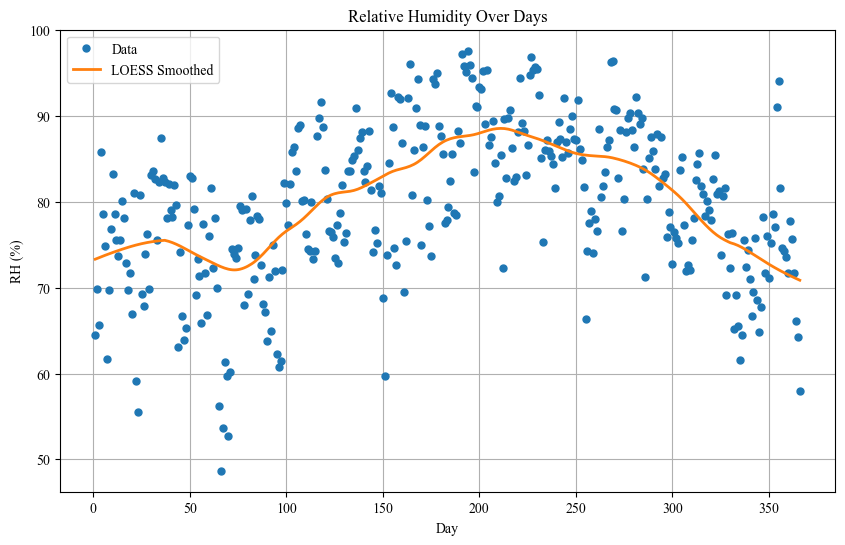

In [18]:
grouped_data = df.groupby('day')['RH'].mean()
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'

# Smooth the data using LOESS
smoothed = lowess(grouped_data.values, grouped_data.index, frac=0.2)

plt.plot(grouped_data.index, grouped_data.values, marker='o', color='tab:blue', linestyle='', markersize=5, label='Data')
plt.plot(smoothed[:,0], smoothed[:,1], color='tab:orange', linewidth=2, label='LOESS Smoothed')

plt.title('Relative Humidity Over Days')
plt.xlabel('Day')
plt.ylabel('RH (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\png\\RH_day_smooth.png', dpi=300)
plt.show()
plt.show()

Temperature

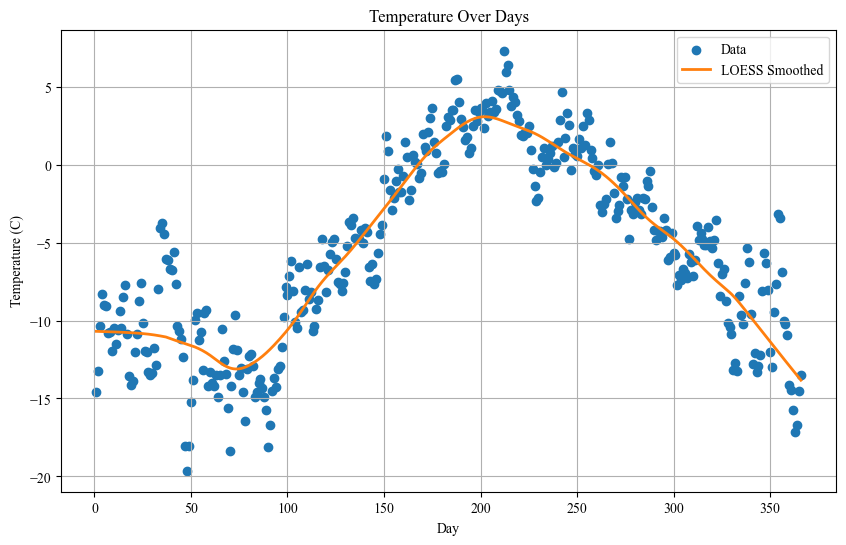

In [19]:
grouped_data = df.groupby('day')['temperature'].mean()
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'

# Plot the scatter plot
plt.scatter(grouped_data.index, grouped_data, color='tab:blue', label='Data')

# Smooth the data using LOESS
smoothed = lowess(grouped_data.values, grouped_data.index, frac=0.2)

# Plot the LOESS smoothed line
plt.plot(smoothed[:,0], smoothed[:,1], color='tab:orange', linewidth=2, label='LOESS Smoothed')

plt.title('Temperature Over Days')
plt.xlabel('Day')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\png\\T_day_smooth.png', dpi=300)
plt.show()

Solar Radiation

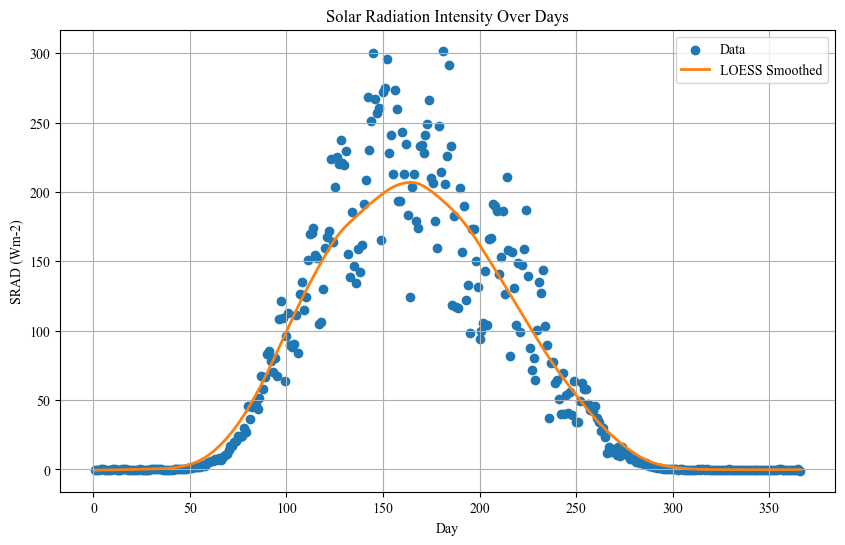

In [20]:
grouped_data = df.groupby('day')['SWD'].mean()
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'

# Plot the scatter plot
plt.scatter(grouped_data.index, grouped_data, color='tab:blue', label='Data')

# Smooth the data using LOESS
smoothed = lowess(grouped_data.values, grouped_data.index, frac=0.2)

# Plot the LOESS smoothed line
plt.plot(smoothed[:,0], smoothed[:,1], color='tab:orange', linewidth=2, label='LOESS Smoothed')

plt.title('Solar Radiation Intensity Over Days')
plt.xlabel('Day')
plt.ylabel('SRAD (Wm-2)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_arctic\\NPF_project_arctic\\png\\SRAD_day_smooth.png', dpi=300)
plt.show()